In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import mean_squared_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import InputLayer, Dense 
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [7]:
import io
train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [8]:
test = pd.read_csv(io.BytesIO(uploaded['Test.csv']))

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
liste={'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}

train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


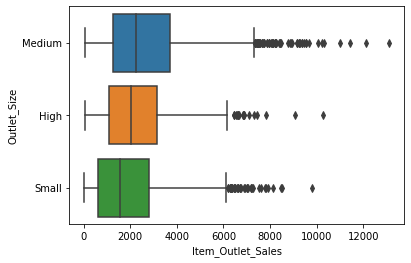

In [13]:
#Plotting the sales and the Outlet size
import seaborn as sns
sns.boxplot('Item_Outlet_Sales','Outlet_Size',data=train)

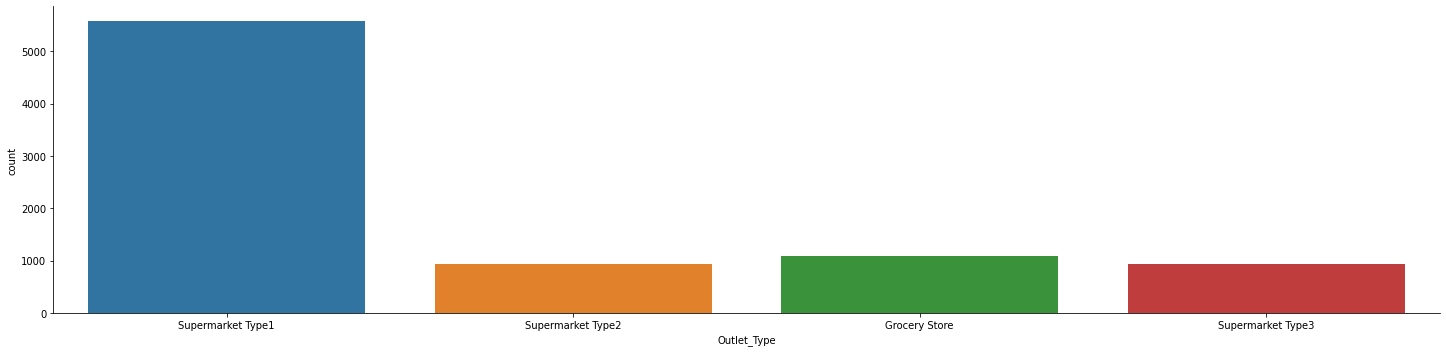

In [14]:
#Plotting the different type of outlets
sns.catplot('Outlet_Type',kind = 'count',data = train,aspect =4)

In [15]:
#Supermarket Type1 has the higher volume of sales

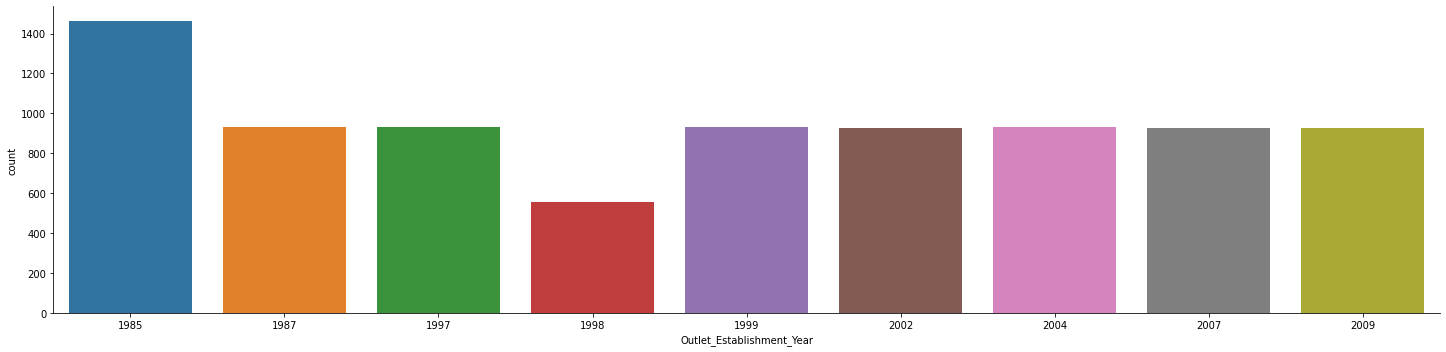

In [16]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = train,aspect =4)

In [17]:
#Year1985 has the highest sales volumes

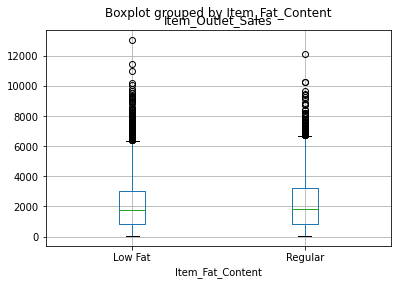

In [18]:
#Boxplot of Item Fat content
train.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content')

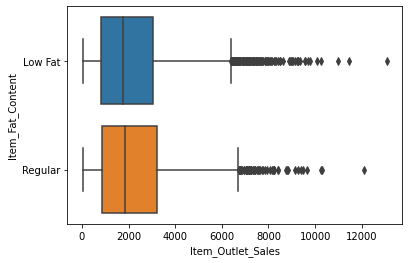

In [19]:
sns.boxplot('Item_Outlet_Sales','Item_Fat_Content',data=train)

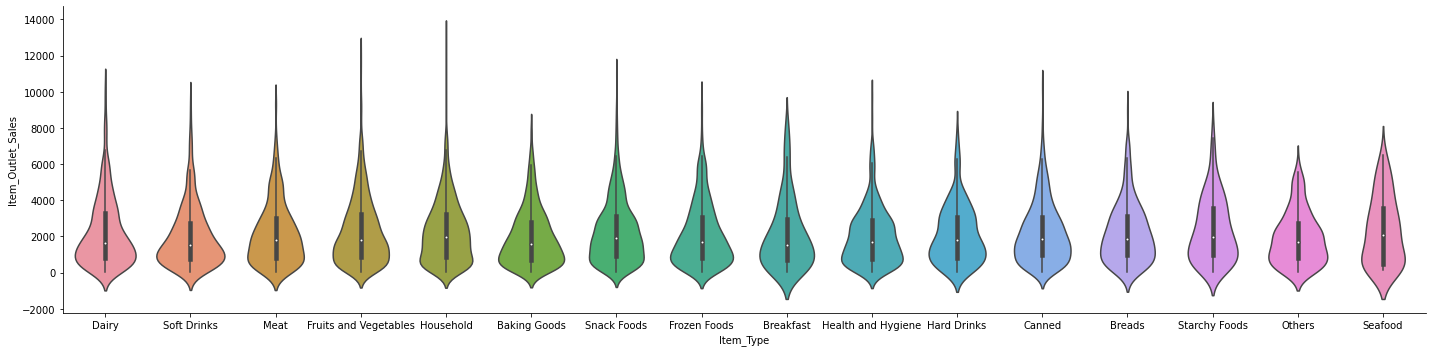

In [20]:
#Plotting some Categorical variable with the target variable
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data = train,aspect=4)

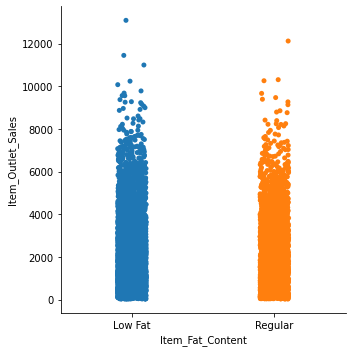

In [21]:
sns.catplot(x = 'Item_Fat_Content',y = 'Item_Outlet_Sales',data = train)

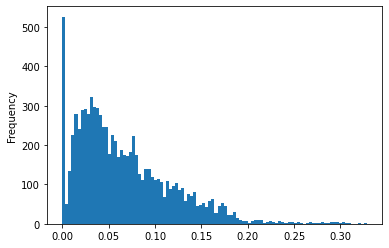

In [22]:
#checking Item_visibility 
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [23]:
#Treatment of Items with 0 visility
me=train[train['Item_Visibility']!=0]['Item_Visibility'].mean()
print(me)
train['Item_Visibility']=train['Item_Visibility'].replace(0.000000,me)

mtest=test[test['Item_Visibility']!=0]['Item_Visibility'].mean()
test['Item_Visibility']=test['Item_Visibility'].replace(0.000000,mtest)

0.07048184085069421


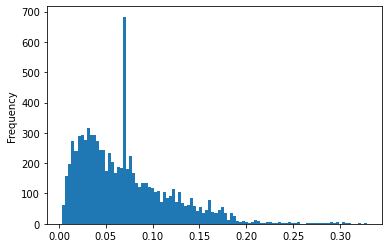

In [24]:
train['Item_Visibility'].plot(kind = 'hist',bins = 100)

In [25]:
#Checking for missing values

In [26]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
#imputing missing values

In [28]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914
std,4.643456,0.048730,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.773750,0.033085,93.826500,1987.000000,834.247400
50%,12.600000,0.062517,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
train['Outlet_Size']=train['Outlet_Size'].fillna('Medium')
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [30]:
train['Item_Weight']=train['Item_Weight'].fillna(train.Item_Weight.mean())
test['Item_Weight']=test['Item_Weight'].fillna(test.Item_Weight.mean())

In [31]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
Item_Identifier= test['Item_Identifier']
Outlet_Identifier=test['Outlet_Identifier']


In [33]:
#Creating categories for the Item type
train['Item_new'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_new'] = train['Item_new'].map({'FD':'Food','NC':'Goods','DR':'Drinks'})
train['Item_new'].value_counts()

test['Item_new'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_new'] = test['Item_new'].map({'FD':'Food','NC':'Goods','DR':'Drinks'})

In [34]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.070482,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.070482,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Goods


In [35]:
train=train.drop('Item_Type',axis=1)
test=test.drop('Item_Type',axis=1)

In [36]:
train=train.rename(columns={'Item_new':'Item_Type'})
test=test.rename(columns={'Item_new':'Item_Type'})

In [37]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.070482,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.070482,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Goods


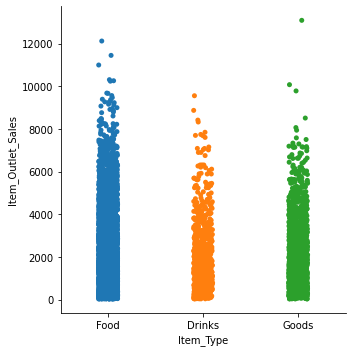

In [38]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',data = train)

In [39]:
#Dropping Item_Identifier column
train=train.drop('Item_Identifier',axis=1)
test=test.drop('Item_Identifier',axis=1)

In [40]:
#Creating new column named age
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
train['Age']=2009 - train['Outlet_Establishment_Year']
test['Age']=2009 - test['Outlet_Establishment_Year']
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070482,140.992782,1997.831867,2181.288914,11.168133
std,4.226124,0.048730,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,0.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,5.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,10.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,22.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,24.000000


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Item_Type                  8523 non-null   object 
 11  Age                        8523 non-null   int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [43]:
train=train.drop('Outlet_Establishment_Year',axis=1)
test=test.drop('Outlet_Establishment_Year',axis=1)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type,Age
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,10
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,0
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,10
3,19.20,Regular,0.070482,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,Food,11
4,8.93,Low Fat,0.070482,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Goods,22


In [44]:
#Encoding the variables
#y=pd.get_dummies(y,drop_first=True)
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Food,Item_Type_Goods
0,9.30,0.016047,249.8092,3735.1380,10,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,10,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
3,19.20,0.070482,182.0950,732.3800,11,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,8.93,0.070482,53.8614,994.7052,22,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [45]:
#Normalization
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [46]:
trainscaled=SS.fit_transform(train)
testscaled=SS.fit_transform(test)
#yscaled=SS.fit_transform(y)

In [47]:
trainscaled=pd.DataFrame(trainscaled,columns=train.columns)
testscaled=pd.DataFrame(testscaled,columns=test.columns)
#yscaled=pd.DataFrame(yscaled,columns=y.columns)

In [48]:
trainscaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Age,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Food,Item_Type_Goods
0,-0.841872,-1.117123e+00,1.747454,0.910601,-0.139541,-0.738147,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.641706,-1.050818e+00,-1.489023,-1.018440,-1.334103,1.354743,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,1.098554,-1.102496e+00,0.010040,-0.049238,-0.139541,-0.738147,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.500838,3.702459e-15,0.660050,-0.849103,-0.020085,1.354743,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.929428,3.702459e-15,-1.399220,-0.695373,1.293934,-0.738147,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [49]:
#Creating X and Y
y=trainscaled['Item_Outlet_Sales']
X=trainscaled.drop('Item_Outlet_Sales',axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Age,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Food,Item_Type_Goods
0,-0.841872,-1.117123e+00,1.747454,-0.139541,-0.738147,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
1,-1.641706,-1.050818e+00,-1.489023,-1.334103,1.354743,-0.350395,-0.349128,2.860816,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,2.860816,-0.351028,-1.598190,-0.480558
2,1.098554,-1.102496e+00,0.010040,-0.139541,-0.738147,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,2.857362,0.798807,-0.623893,-0.696678,-0.804732,0.726802,-0.349551,-0.351028,0.625708,-0.480558
3,1.500838,3.702459e-15,0.660050,-0.020085,1.354743,-0.350395,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,0.798807,-0.623893,-0.696678,1.242650,-1.375891,-0.349551,-0.351028,0.625708,-0.480558
4,-0.929428,3.702459e-15,-1.399220,1.293934,-0.738147,2.853918,-0.349128,-0.349551,-0.256985,-0.351028,-0.349973,-0.349762,-0.349973,-0.349973,-1.251866,-0.623893,-0.696678,1.242650,0.726802,-0.349551,-0.351028,-1.598190,2.080915


In [50]:
y.shape

(8523,)

In [51]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [52]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((5966, 23), (5966,)), ((2557, 23), (2557,)))

In [53]:
#Checking the bestscore and parameters with Gridsearch and Keras regressor

In [54]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential

def create_model(optimizer='Adadelta',activation='softsign'):
    # create model
    model = Sequential()
    model.add(Dense(9, input_dim=X_train.shape[1], activation='softsign'))
    model.add(Dense(5, activation='softsign'))
    model.add(Dense(5, activation='softsign'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
    return model
# define the grid search parameters
model = KerasRegressor(build_fn=create_model, epochs=15, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'linear']
optimizer = [ 'Adagrad','Adam','Adadelta','SGD']
epochs=[5,15,25,30,60]
param_grid = dict(optimizer=optimizer,activation=activation,epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2, cv=3,scoring="r2")
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.585506 using {'activation': 'relu', 'epochs': 30, 'optimizer': 'SGD'}
0.554778 (0.009148) with: {'activation': 'softmax', 'epochs': 5, 'optimizer': 'Adagrad'}
0.558889 (0.008787) with: {'activation': 'softmax', 'epochs': 5, 'optimizer': 'Adam'}
0.565429 (0.009664) with: {'activation': 'softmax', 'epochs': 5, 'optimizer': 'Adadelta'}
0.534608 (0.013080) with: {'activation': 'softmax', 'epochs': 5, 'optimizer': 'SGD'}
0.573876 (0.004804) with: {'activation': 'softmax', 'epochs': 15, 'optimizer': 'Adagrad'}
0.576261 (0.008955) with: {'activation': 'softmax', 'epochs': 15, 'optimizer': 'Adam'}
0.580835 (0.001560) with: {'activation': 'softmax', 'epochs': 15, 'optimizer': 'Adadelta'}
0.572248 (0.011913) with: {'activation': 'softmax', 'epochs': 15, 'optimizer': 'SGD'}
0.579216 (0.004598) with: {'activation': 'softmax', 'epochs': 25, 'optimizer': 'Adagrad'}
0.582084 (0.008194) with: {'activation': 'softmax', 'epochs': 25, 'optimizer': 'Adam'}
0.584813 (0.006942) with: {'activation': 

In [64]:
# create model
model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='softplus'))
model.add(Dense(3, activation='softplus'))
model.add(Dense(4, activation='softplus'))
model.add(Dense(1,  activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='Adadelta',metrics=['mse'])

#summary of the model
model.summary()

#fit the model
History = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=25, verbose=0)
# evaluate model
train_mse = model.evaluate(X_train,y_train, verbose=0) 
test_mse = model.evaluate(X_test,y_test, verbose=0)

print('Train:',train_mse) 
print('Test:',test_mse)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 27        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________
Train: [0.3928321412634298, 0.3928320109844208]
Test: [0.3981300427384986, 0.39812999963760376]


In [65]:
hist = pd.DataFrame(History.history)
hist['epoch'] = History.epoch
hist.head(10)

,val_loss,val_mse,loss,mse,epoch
0,0.823428,0.823428,1.028097,1.028096,0
1,0.472025,0.472025,0.617447,0.617447,1
2,0.428545,0.428545,0.437530,0.437530,2
3,0.417731,0.417731,0.419673,0.419673,3
4,0.425055,0.425055,0.411418,0.411418,4
5,0.408454,0.408454,0.408639,0.408640,5
6,0.407583,0.407583,0.406162,0.406162,6
7,0.404602,0.404602,0.404330,0.404330,7
8,0.404063,0.404063,0.403060,0.403060,8
9,0.401949,0.401949,0.401758,0.401758,9


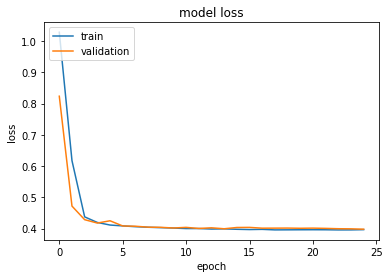

In [66]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [67]:
Predicted=model.predict(X_test).flatten()
#calculating the R2 score on validation set
print('MSE of predictions:', mean_squared_error(Predicted,y_test))
print('RMSE of predictions :',np.sqrt(mean_squared_error(Predicted,y_test)))
print('R2 is : ',r2_score(y_test, Predicted))

MSE of predictions: 0.3981300413102507
RMSE of predictions : 0.6309754680732451
R2 is :  0.616206683941869


In [68]:
#We can conclude that we use the last model that can give us a r2 of 0.6162.

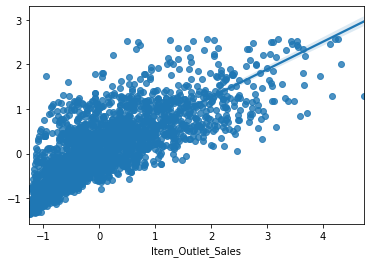

In [69]:
import seaborn as sns
sns.regplot(x=y_test, y=Predicted)

In [70]:
#Final predictions

final_pred = model.predict(test)
my_submission = pd.DataFrame(final_pred)
my_submission.to_csv('submission_sales.csv', index=False)

In [71]:
my_submission.to_csv("test1.csv")

In [72]:
from IPython.display import HTML
import base64
def create_download_link( my_submission, title = "Download CSV file", filename = "data.csv"):  
    csv = my_submission.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(my_submission)